<a href="https://colab.research.google.com/github/bledibuduri/Predicting-Sentiment-from-Tweets/blob/main/Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[nltk_data] Downloading package twitter_samples to /root/nltk_data...
[nltk_data]   Package twitter_samples is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


Accuracy: 0.7565
              precision    recall  f1-score   support

           0       0.74      0.79      0.76       988
           1       0.78      0.72      0.75      1012

    accuracy                           0.76      2000
   macro avg       0.76      0.76      0.76      2000
weighted avg       0.76      0.76      0.76      2000



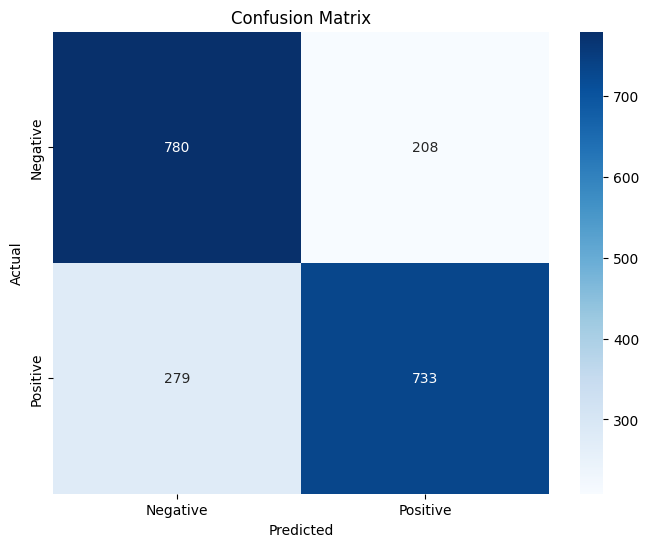

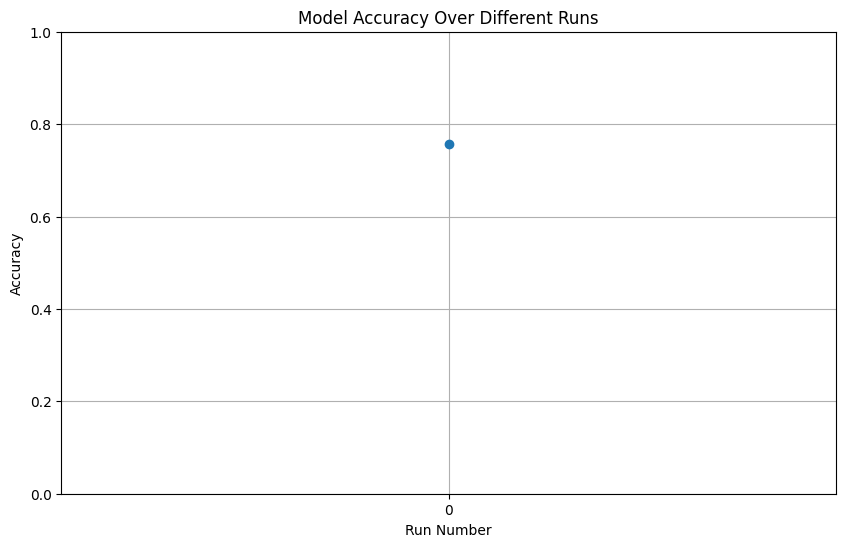

<ipython-input-3-d5d95b360eae>:103: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=freq_df, x='Frequency', y='Word', palette='viridis')


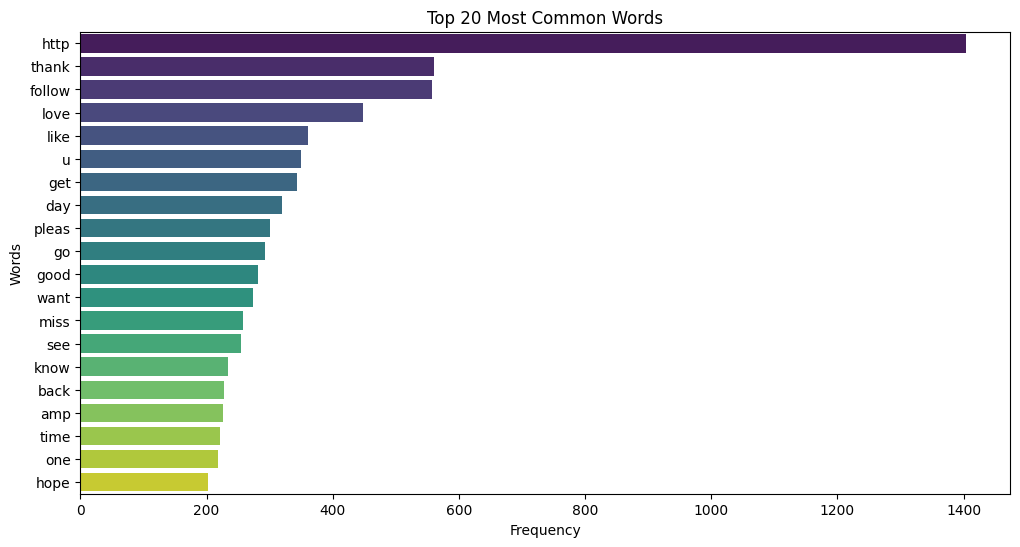

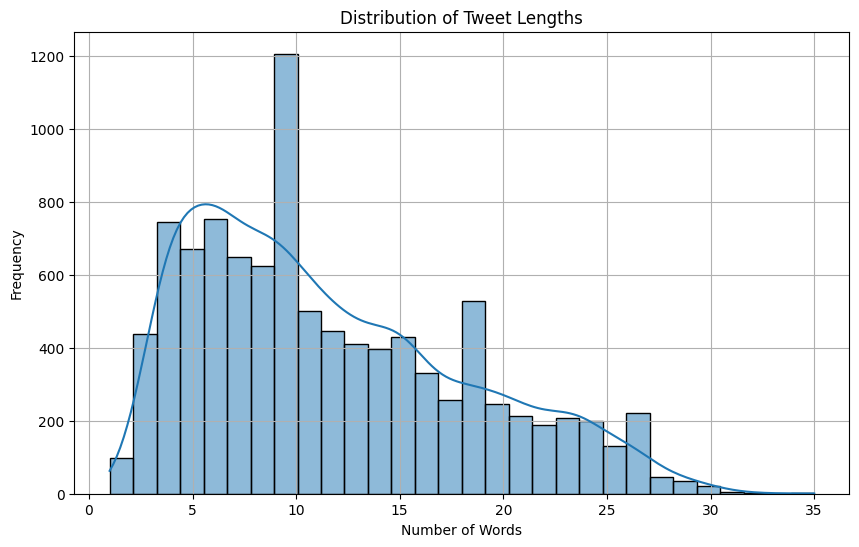

<ipython-input-3-d5d95b360eae>:128: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=label_counts.index, y=label_counts.values, palette='pastel')


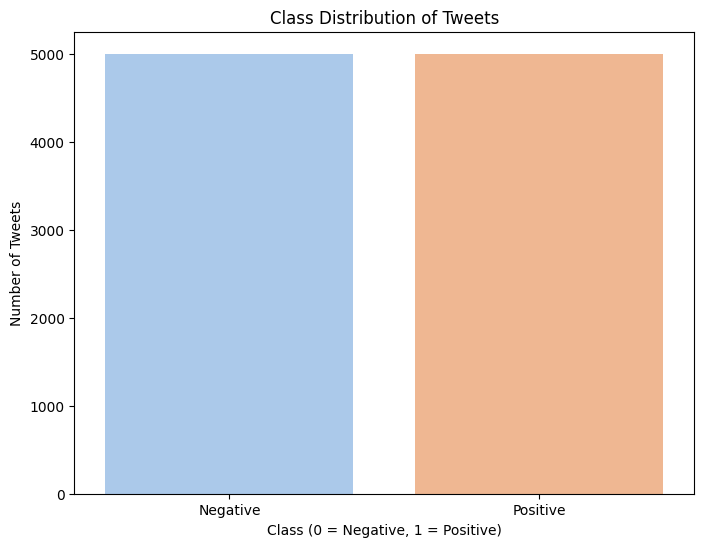

<ipython-input-3-d5d95b360eae>:146: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=bigram_df, x='Frequency', y='Bigram', palette='viridis')


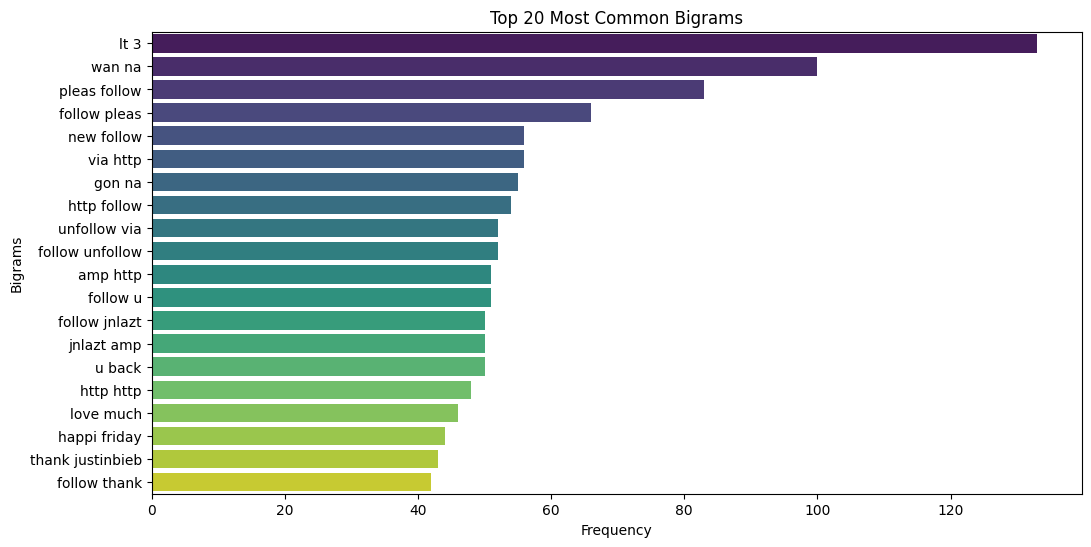

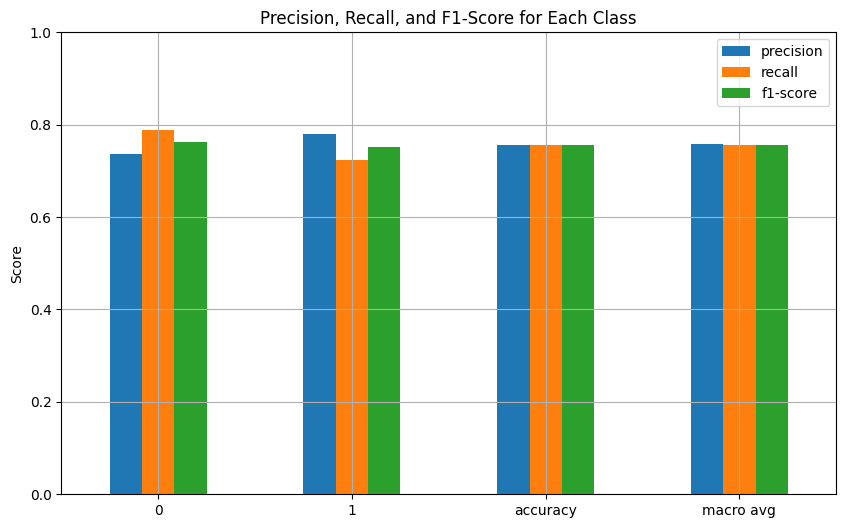

In [3]:
import nltk
from nltk.corpus import twitter_samples
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from nltk import ngrams

# Download the Twitter samples corpus
nltk.download('twitter_samples')
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('punkt_tab')

# Load positive and negative tweets
positive_tweets = twitter_samples.strings('positive_tweets.json')
negative_tweets = twitter_samples.strings('negative_tweets.json')

# Combine the datasets
tweets = positive_tweets + negative_tweets
labels = [1] * len(positive_tweets) + [0] * len(negative_tweets)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(tweets, labels, test_size=0.2, random_state=42)

# Text preprocessing
def preprocess_tweets(tweets):
    stemmer = PorterStemmer()
    stop_words = set(stopwords.words('english'))
    processed_tweets = []

    for tweet in tweets:
        tokens = word_tokenize(tweet)
        tokens = [stemmer.stem(word.lower()) for word in tokens if word.isalnum() and word.lower() not in stop_words]
        processed_tweets.append(' '.join(tokens))

    return processed_tweets

X_train_processed = preprocess_tweets(X_train)
X_test_processed = preprocess_tweets(X_test)

# Feature extraction
vectorizer = CountVectorizer()
X_train_vectorized = vectorizer.fit_transform(X_train_processed)
X_test_vectorized = vectorizer.transform(X_test_processed)

# Train the Naive Bayes classifier
model = MultinomialNB()
model.fit(X_train_vectorized, y_train)

# Make predictions
y_pred = model.predict(X_test_vectorized)

# Calculate accuracy and report
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

# Output the results
print(f'Accuracy: {accuracy}')
print(report)

# Visualizations

# Confusion Matrix
def plot_confusion_matrix(y_true, y_pred):
    conf_matrix = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.title('Confusion Matrix')
    plt.show()

plot_confusion_matrix(y_test, y_pred)

# Accuracy over time (if multiple runs were conducted)
accuracy_values = [accuracy]  # This should be populated with multiple accuracy values from different runs
plt.figure(figsize=(10, 6))
plt.plot(accuracy_values, marker='o')
plt.title('Model Accuracy Over Different Runs')
plt.xlabel('Run Number')
plt.ylabel('Accuracy')
plt.xticks(range(len(accuracy_values)))
plt.ylim(0, 1)  # Set limits to 0-1 for accuracy
plt.grid()
plt.show()

# Word Frequencies
def plot_word_frequencies(tweets):
    all_words = ' '.join(tweets)
    words = word_tokenize(all_words)
    freq_dist = nltk.FreqDist(words)
    freq_df = pd.DataFrame(freq_dist.items(), columns=['Word', 'Frequency']).sort_values(by='Frequency', ascending=False).head(20)

    plt.figure(figsize=(12, 6))
    sns.barplot(data=freq_df, x='Frequency', y='Word', palette='viridis')
    plt.title('Top 20 Most Common Words')
    plt.xlabel('Frequency')
    plt.ylabel('Words')
    plt.show()

plot_word_frequencies(X_train_processed)

# Distribution of Tweet Lengths
def plot_tweet_length_distribution(tweets):
    tweet_lengths = [len(tweet.split()) for tweet in tweets]
    plt.figure(figsize=(10, 6))
    sns.histplot(tweet_lengths, bins=30, kde=True)
    plt.title('Distribution of Tweet Lengths')
    plt.xlabel('Number of Words')
    plt.ylabel('Frequency')
    plt.grid()
    plt.show()

plot_tweet_length_distribution(tweets)

# Class Distribution
def plot_class_distribution(labels):
    label_counts = pd.Series(labels).value_counts()
    plt.figure(figsize=(8, 6))
    sns.barplot(x=label_counts.index, y=label_counts.values, palette='pastel')
    plt.title('Class Distribution of Tweets')
    plt.xlabel('Class (0 = Negative, 1 = Positive)')
    plt.ylabel('Number of Tweets')
    plt.xticks([0, 1], ['Negative', 'Positive'])
    plt.show()

plot_class_distribution(labels)

# Top N-Bigrams
def plot_top_bigrams(tweets, n=20):
    all_words = ' '.join(tweets)
    bigrams = ngrams(word_tokenize(all_words), 2)
    bigram_freq = nltk.FreqDist(bigrams)
    bigram_df = pd.DataFrame(bigram_freq.items(), columns=['Bigram', 'Frequency']).sort_values(by='Frequency', ascending=False).head(n)
    bigram_df['Bigram'] = bigram_df['Bigram'].apply(lambda x: ' '.join(x))

    plt.figure(figsize=(12, 6))
    sns.barplot(data=bigram_df, x='Frequency', y='Bigram', palette='viridis')
    plt.title(f'Top {n} Most Common Bigrams')
    plt.xlabel('Frequency')
    plt.ylabel('Bigrams')
    plt.show()

plot_top_bigrams(X_train_processed)

# Precision, Recall, and F1-Score Visualization
def plot_classification_report(report):
    report_dict = classification_report(y_test, y_pred, output_dict=True)
    metrics_df = pd.DataFrame(report_dict).transpose()
    metrics_df = metrics_df[['precision', 'recall', 'f1-score']].iloc[:-1]  # Exclude the 'support' row

    metrics_df.plot(kind='bar', figsize=(10, 6))
    plt.title('Precision, Recall, and F1-Score for Each Class')
    plt.ylabel('Score')
    plt.xticks(rotation=0)
    plt.ylim(0, 1)
    plt.grid()
    plt.show()

plot_classification_report(report)